# Breast-Lesions Dataset

First, I'm going to visualize the dataset

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

info_file = "../data/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
images_folder = "../data/BrEaST-Lesions_USG-images_and_masks/"

Número de muestras por clase:
label
0    154
1     98
2      4
Name: count, dtype: int64


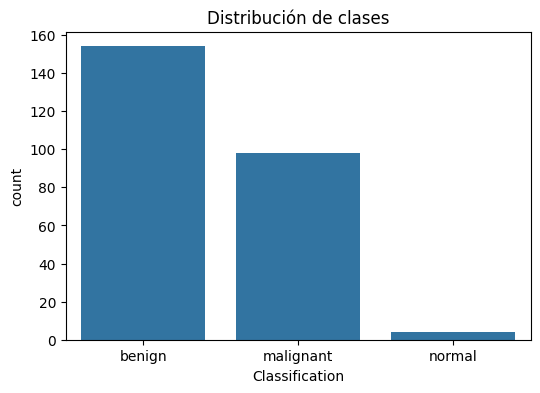

In [ ]:
df = pd.read_excel(info_file, sheet_name='BrEaST-Lesions-USG clinical dat')

# Limpiar y mapear etiquetas a 0/1/2
df = df.dropna(subset=["Classification"])
class_map = {'benign': 0, 'malignant': 1, 'normal': 2}
df['label'] = df['Classification'].map(class_map)

print("Number of samples per class:")
print(df['label'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Classification', data=df)
plt.title("Class Distribution")
plt.show()

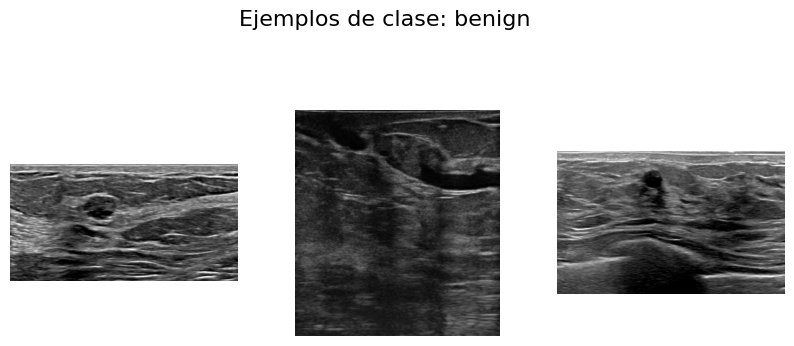

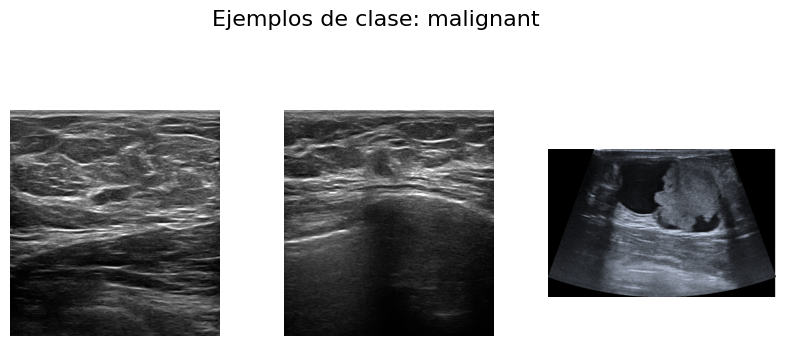

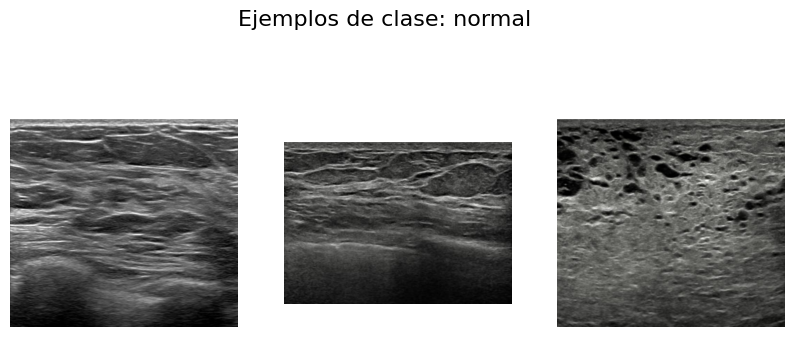

In [ ]:
df["image_path"] = df["Image_filename"].apply(
    lambda x: os.path.join(images_folder, x)
)

def show_examples(df, class_name, n=9):
    subset = df[df["Classification"] == class_name].sample(min(len(df[df["Classification"] == class_name]), n))
    
    plt.figure(figsize=(10,10))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = Image.open(row["image_path"]).convert("RGB")
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Examples of class: {class_name}", fontsize=16)
    plt.show()

show_examples(df, "benign", 3)
show_examples(df, "malignant", 3)
show_examples(df, "normal", 3)


In [ ]:
from collections import Counter

sizes = []

for img_path in df["image_path"]:
    try:
        with Image.open(img_path) as im:
            sizes.append(im.size)
    except:
        sizes.append(("corrupt", "corrupt"))


cnt = Counter(sizes)
print("Most common image resolutions:")
for s, c in cnt.most_common(10):
    print(s, ":", c, "images")


Resoluciones más comunes:
(485, 537) : 66 imágenes
(433, 469) : 28 imágenes
(545, 532) : 22 imágenes
(831, 538) : 15 imágenes
(623, 526) : 12 imágenes
(761, 572) : 8 imágenes
(761, 609) : 8 imágenes
(503, 470) : 8 imágenes
(437, 541) : 6 imágenes
(727, 518) : 6 imágenes


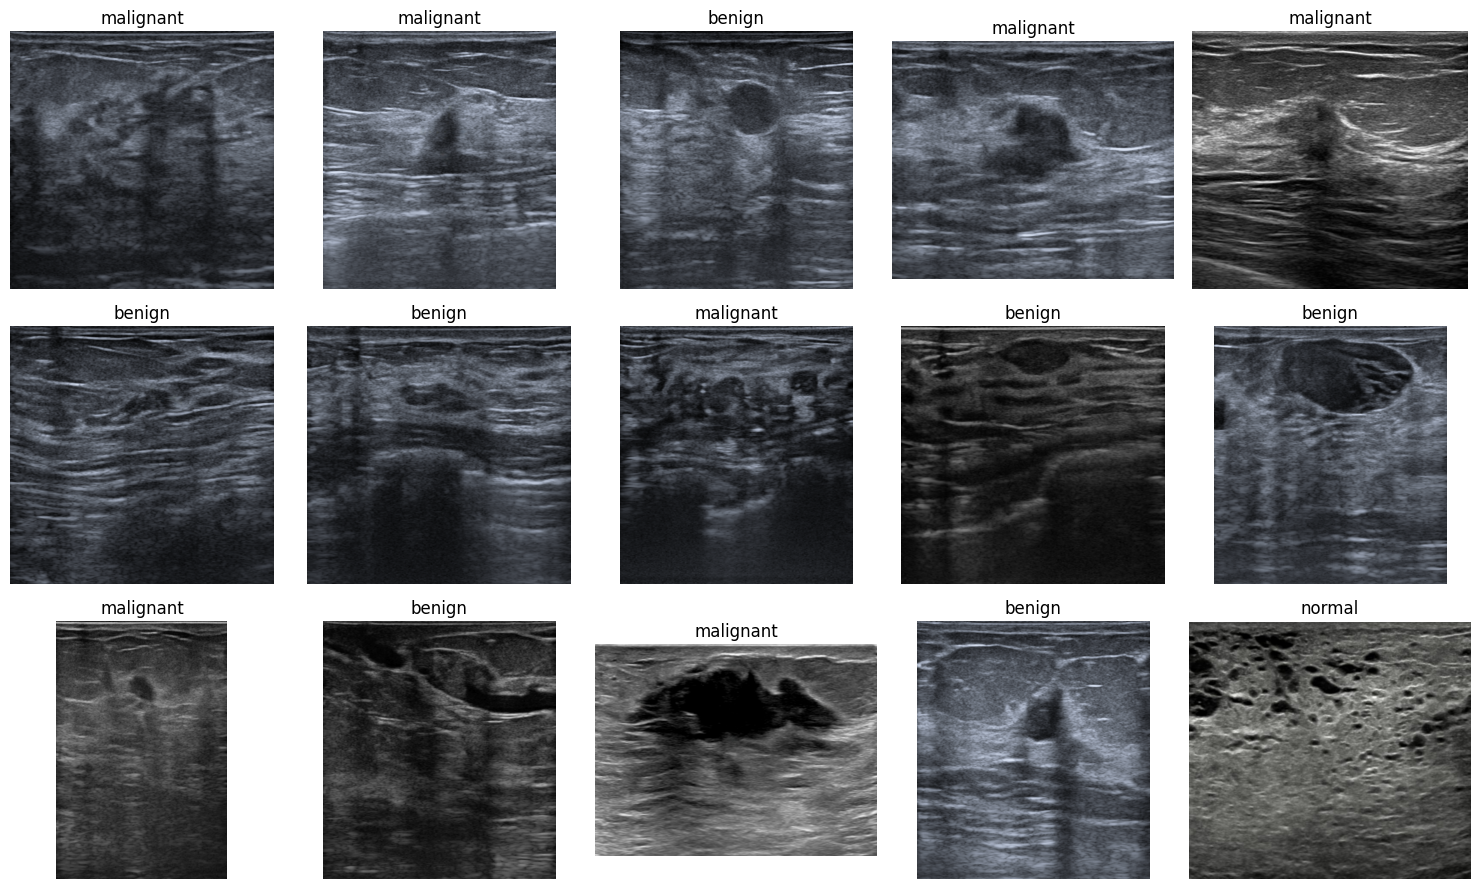

In [ ]:
def show_random_grid(df, rows=3, cols=5):
    sample_df = df.sample(rows * cols)
    plt.figure(figsize=(cols*3, rows*3))
    
    for i, (_, row) in enumerate(sample_df.iterrows()):
        img = Image.open(row["image_path"]).convert("RGB")
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(row["Classification"])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random_grid(df)
